<a href="https://colab.research.google.com/github/ndb796/faceswap_examples/blob/master/Faces_from_Videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/'My Drive'/'Colab Notebooks'/videos/obama.mp4 obama.mp4
!cp /content/gdrive/'My Drive'/'Colab Notebooks'/videos/bush.mp4 bush.mp4
!ls

bush.mp4  gdrive  obama.mp4  sample_data


In [0]:
"""
dlib를 이용해서 얼굴이 존재하는 위치의 Bounding Box를 확실히 결정합니다.
단순히 찾은 얼굴을 그대로 이용하지는 않고, 그 크기를 조금 더 확대합니다.
"""
def get_boundingbox(face, width, height, scale=1.3, minsize=None):
    # 기존에 찾은 얼굴이 존재하는 위치
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    
    # 특정 크기 이상이 되도록 size를 계산
    size_bb = int(max(x2 - x1, y2 - y1) * scale)
    if minsize:
        if size_bb < minsize:
            size_bb = minsize
    
    # 얼굴이 존재하는 중간점을 기준으로, Bounding Box의 크기를 확장
    center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2

    # 전체 이미지 Bound를 벗어나지는 않는지 확인
    x1 = max(int(center_x - size_bb // 2), 0)
    y1 = max(int(center_y - size_bb // 2), 0)
    size_bb = min(width - x1, size_bb)
    size_bb = min(height - y1, size_bb)

    return x1, y1, size_bb

Starting: obama.mp4, Frames: 3909, FPS: 29.97
Frame: 5
[Full Image]


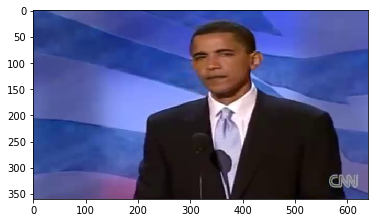

[Cropped Image]


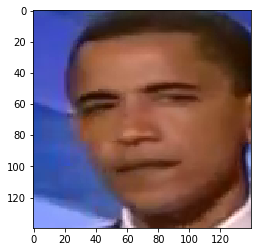

[Updated Cropped Image]


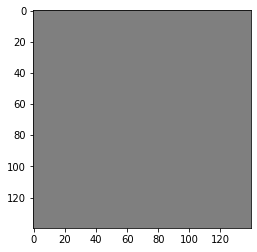

[Updated Full Image]


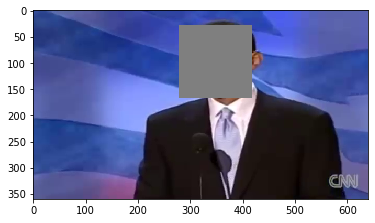

Frame: 6
[Full Image]


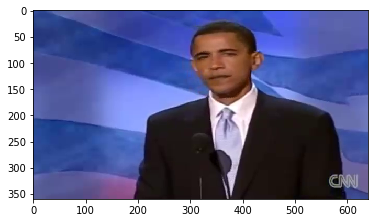

[Cropped Image]


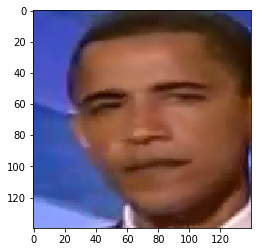

[Updated Cropped Image]


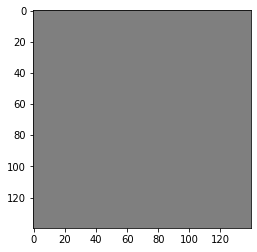

[Updated Full Image]


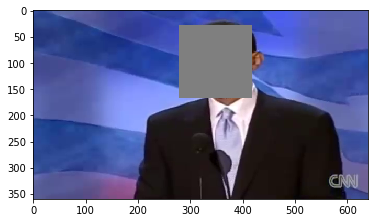

In [33]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

video_path = 'obama.mp4'
frame_num = 0
start_frame = 5
end_frame = 6

assert start_frame < num_frames - 1

# Face Detector 객체를 초기화합니다.
face_detector = dlib.get_frontal_face_detector()

# Video 정보를 읽어 옵니다. (프레임 개수, FPS)
reader = cv2.VideoCapture(video_path)
num_frames = int(reader.get(cv2.CAP_PROP_FRAME_COUNT))
fps = reader.get(cv2.CAP_PROP_FPS)
print('Starting: {}, Frames: {}, FPS: {}'.format(video_path, num_frames, fps))

# Input Video에서 한 장씩 프레임을 읽어 옵니다.
while reader.isOpened():
    _, image = reader.read()
    if image is None:
        break
    frame_num += 1

    # 시작 프레임부터 처리할 수 있도록 합니다.
    if frame_num < start_frame:
        continue
    print('Frame: {}'.format(frame_num))

    # 이미지 사이즈를 읽습니다.
    height, width = image.shape[:2]

    # dlib를 이용해서 얼굴이 존재하는 위치만 Detection합니다.
    faces = face_detector(image, 1)

    # 이미지를 BGR(CV2)에서 RGB로 변경하여 출력합니다.
    print('[Full Image]')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    # 이미지에 얼굴이 존재하는 경우
    if len(faces):
        # 가장 큰 크기의 하나의 얼굴에 대해서만 처리합니다.
        face = faces[0]

        # 얼굴에 해당하는 Bounding Box를 계산하여 추출합니다.
        x, y, size = get_boundingbox(face, width, height)
        cropped_face = image[y:y+size, x:x+size]
        
        # 이미지를 BGR(CV2)에서 RGB로 변경하여 출력합니다.
        print('[Cropped Image]')
        plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
        plt.show()

        # 얼굴에서 특정 위치의 값을 변경합니다.
        cropped_face[:] = [127, 127, 127]

        # 이미지를 BGR(CV2)에서 RGB로 변경하여 출력합니다.
        print('[Updated Cropped Image]')
        plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
        plt.show()

    # 이미지를 BGR(CV2)에서 RGB로 변경하여 출력합니다.
    print('[Updated Full Image]')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    # 마지막 프레임에 해당하면 종료합니다.
    if frame_num >= end_frame:
        break